In [34]:
import pandas as pd
import warnings
import numpy as np
# warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
import scikitplot as skplt
import plotly.express as px

### Read Data

In [35]:
data = pd.read_csv('health_data.csv')

In [36]:
data.head

<bound method NDFrame.head of         Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0       4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1      12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2      13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3      11.0  1.0       1.0        1.0  28.0     1.0                   0.0   
4       8.0  0.0       0.0        1.0  29.0     1.0                   0.0   
...     ...  ...       ...        ...   ...     ...                   ...   
70687   6.0  0.0       1.0        1.0  37.0     0.0                   0.0   
70688  10.0  1.0       1.0        1.0  29.0     1.0                   1.0   
70689  13.0  0.0       1.0        1.0  25.0     0.0                   1.0   
70690  11.0  0.0       1.0        1.0  18.0     0.0                   0.0   
70691   9.0  0.0       1.0        1.0  25.0     0.0                   1.0   

       PhysActivity  Fruits  Veggies  HvyAlco

In [37]:
data.shape

(70692, 18)

#### Data vars visualization:

In [38]:
data.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Diabetes', 'Hypertension', 'Stroke'],
      dtype='object')

<AxesSubplot:>

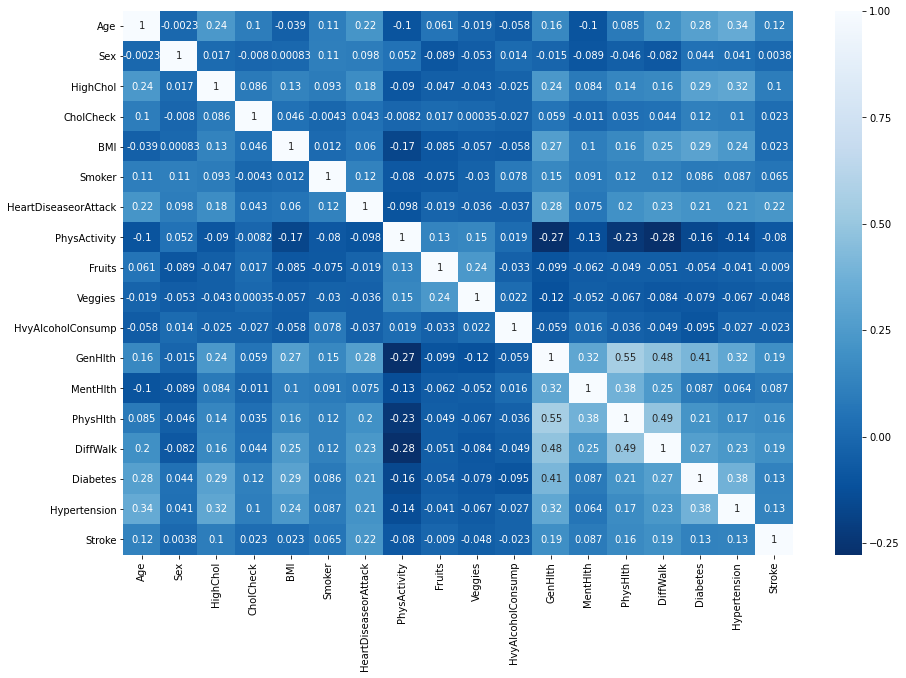

In [39]:
plt.figure(figsize=(15,10))
corr = data[data.columns].corr()
sns.heatmap(corr, annot=True,cmap='Blues_r',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [40]:
data.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Diabetes', 'Hypertension', 'Stroke'],
      dtype='object')

In [41]:
bin_var = ['Sex', 'HighChol', 'CholCheck',  'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'DiffWalk',
       'Diabetes', 'Hypertension', 'Stroke']
cont_var = ['Age','BMI','GenHlth', 'MentHlth', 'PhysHlth']

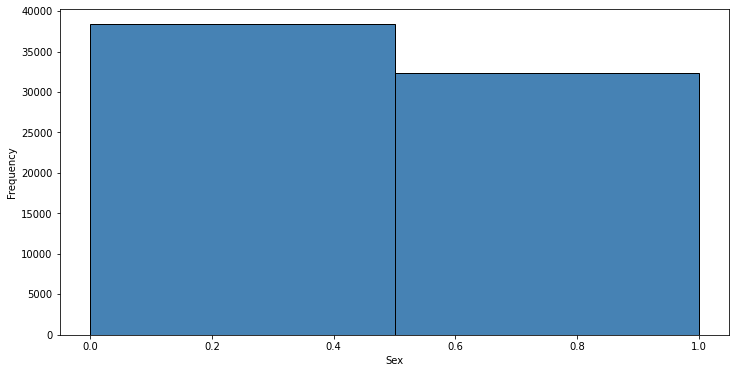

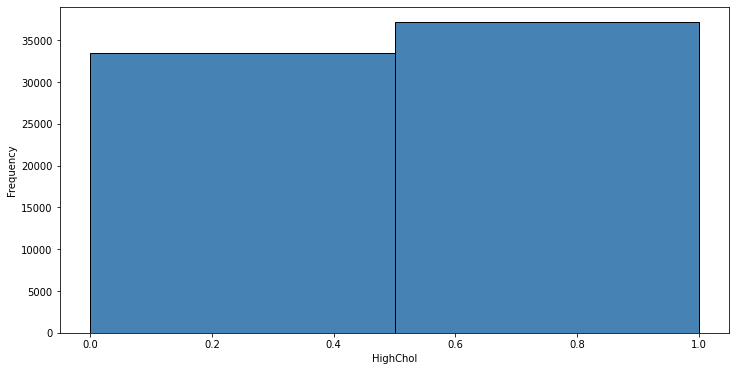

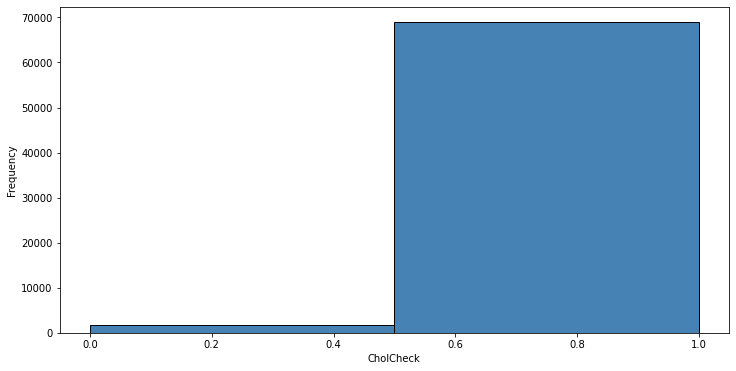

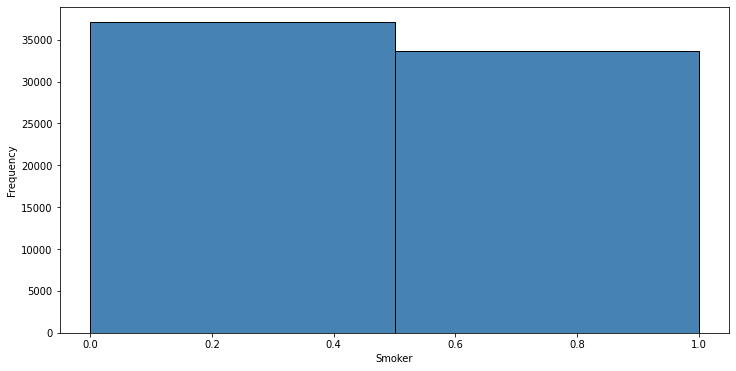

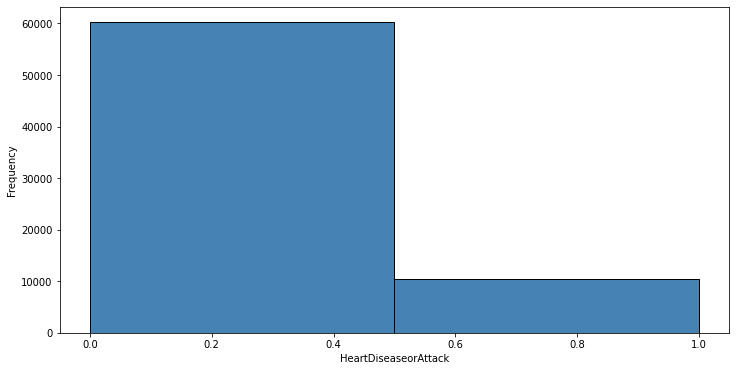

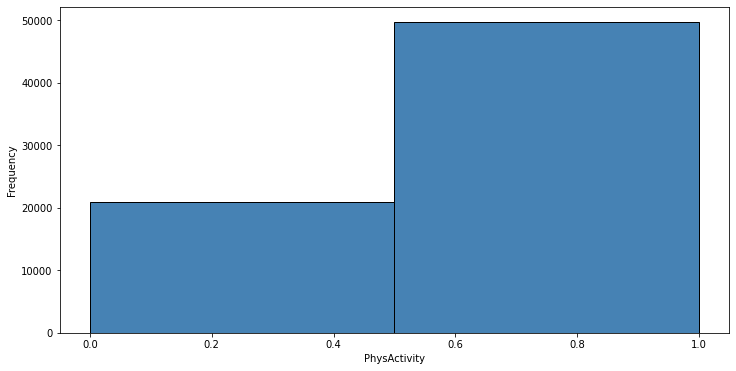

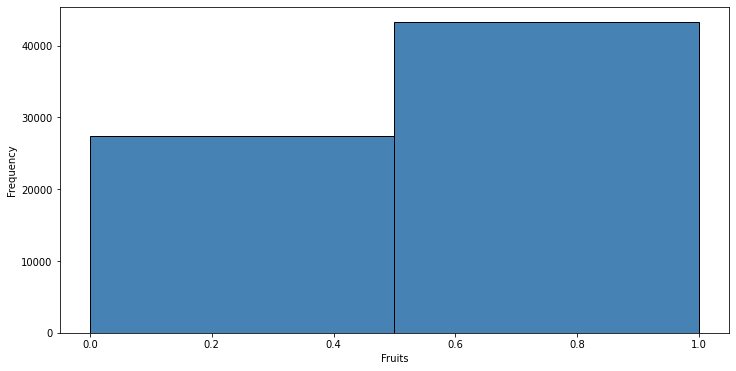

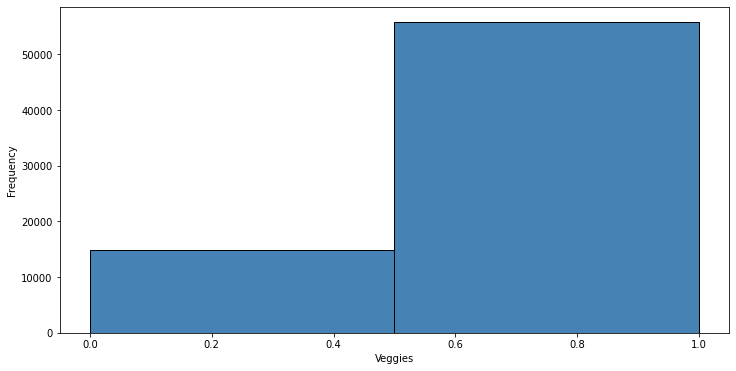

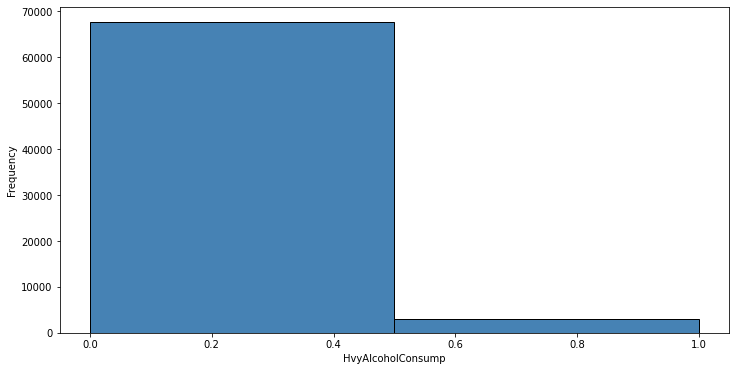

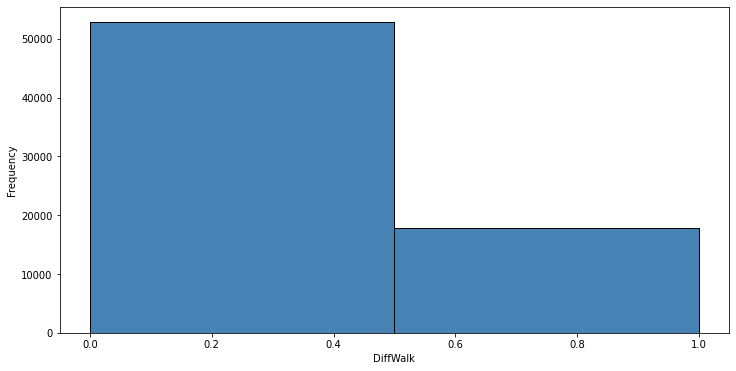

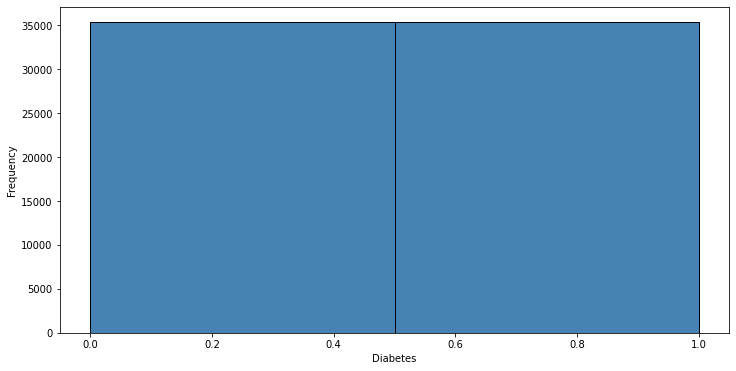

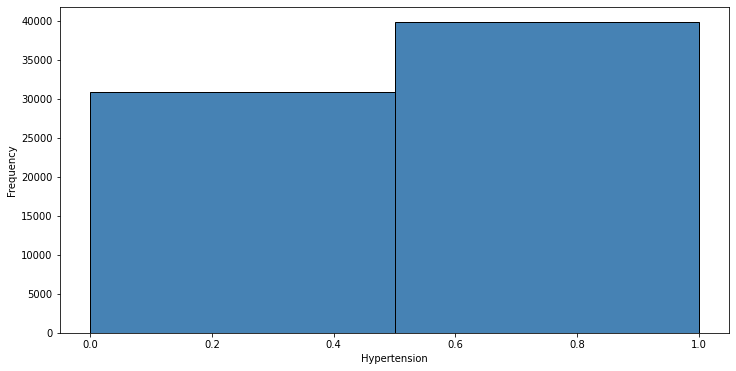

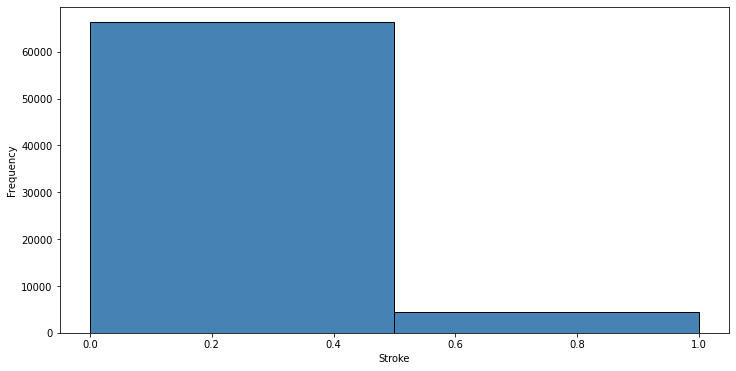

In [42]:
for i in bin_var:
    plt.xlabel(i)
    data[i].plot(kind='hist', bins=2, figsize=(12,6), facecolor='steelblue',edgecolor='black')
    plt.show()

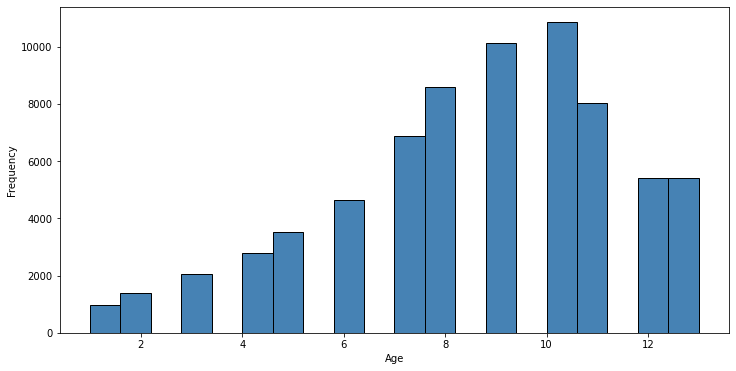

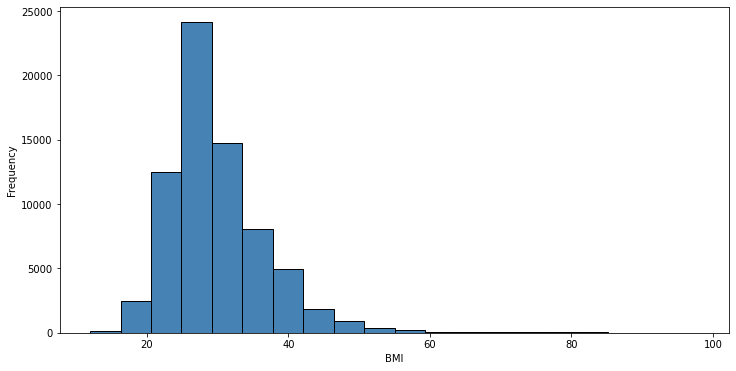

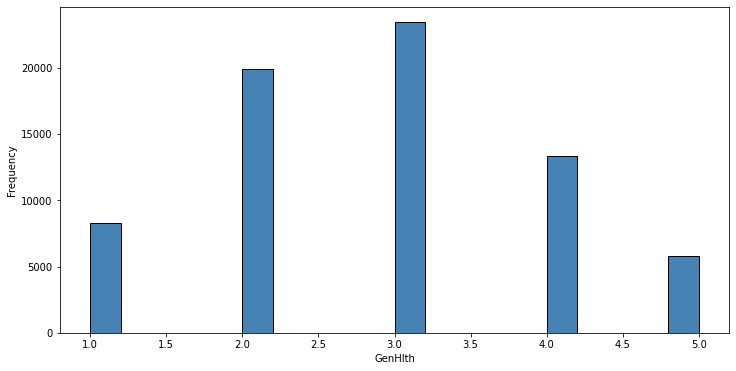

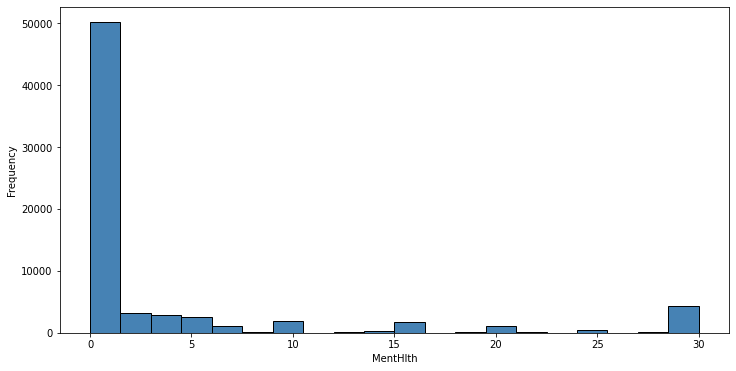

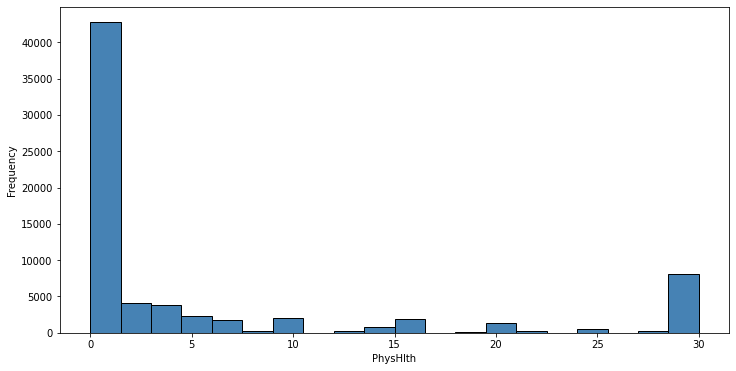

In [43]:
for i in cont_var:
    plt.xlabel(i)
    data[i].plot(kind='hist', bins=20, figsize=(12,6), facecolor='steelblue',edgecolor='black')
    plt.show()

#### Train Test Split


In [44]:
y_cols = ['Diabetes']
X = data.drop(y_cols,axis=1)
y = data[y_cols]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10,stratify=y)

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
X_train.shape

(49484, 17)

In [47]:
X_train_scaled.shape

(49484, 17)

#### Outlier Detection

In [48]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train_scaled)

### logistic reg


In [49]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train_scaled, y_train.values.ravel())
y_pred = logreg.predict(X_test_scaled)

In [50]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[7628, 2976],
       [2512, 8092]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

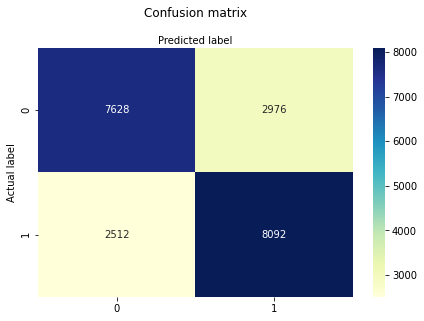

In [51]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Text(0.5,257.44,'Predicted label');

In [52]:
from sklearn.metrics import classification_report
target_names = ['no diabetes', 'diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 no diabetes       0.75      0.72      0.74     10604
    diabetes       0.73      0.76      0.75     10604

    accuracy                           0.74     21208
   macro avg       0.74      0.74      0.74     21208
weighted avg       0.74      0.74      0.74     21208



In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7412297246322143


c:\Users\qiuxi\Anaconda3_2\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


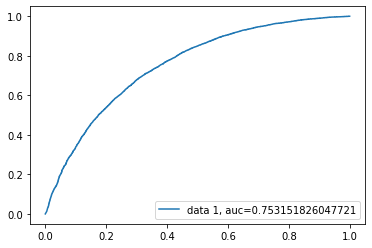

In [54]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<AxesSubplot:title={'center':'PR Curve for Logistic Regression'}, xlabel='Recall', ylabel='Precision'>

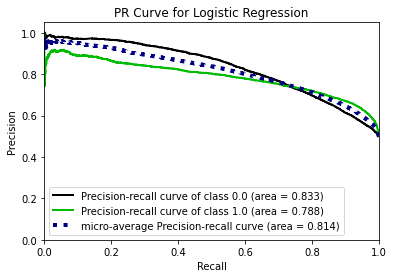

In [55]:
y_log_proba = logreg.predict_proba(X_test_scaled)
skplt.metrics.plot_precision_recall(y_test, y_log_proba, title = 'PR Curve for Logistic Regression')

### Random Forest(MRF)

In [56]:
#model
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train_scaled,y_train)

y_pred=clf.predict(X_test_scaled)

c:\Users\qiuxi\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [57]:
cnf_matrix2 = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix2

array([[7236, 3368],
       [2472, 8132]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

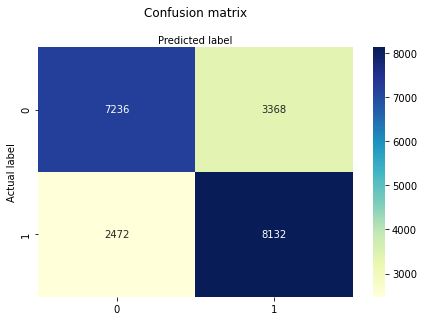

In [58]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Text(0.5,257.44,'Predicted label');

In [59]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train_scaled, y_train)

c:\Users\qiuxi\Anaconda3_2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

In [60]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

BMI                     0.210060
Age                     0.152212
GenHlth                 0.122406
PhysHlth                0.088283
Hypertension            0.085381
MentHlth                0.067734
HighChol                0.042057
Smoker                  0.033824
Fruits                  0.033270
Sex                     0.030674
DiffWalk                0.029323
PhysActivity            0.027854
Veggies                 0.026203
HeartDiseaseorAttack    0.020922
Stroke                  0.011991
HvyAlcoholConsump       0.011073
CholCheck               0.006734
dtype: float64

In [61]:
target_names = ['no diabetes', 'diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 no diabetes       0.75      0.68      0.71     10604
    diabetes       0.71      0.77      0.74     10604

    accuracy                           0.72     21208
   macro avg       0.73      0.72      0.72     21208
weighted avg       0.73      0.72      0.72     21208



In [62]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7246322142587702


### knn classification


In [63]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train_scaled,y_train.values.ravel())
y_pred3 = knn1.predict(X_test_scaled)
cnf_matrix3 = metrics.confusion_matrix(y_test, y_pred3)
cnf_matrix3

array([[7121, 3483],
       [2998, 7606]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

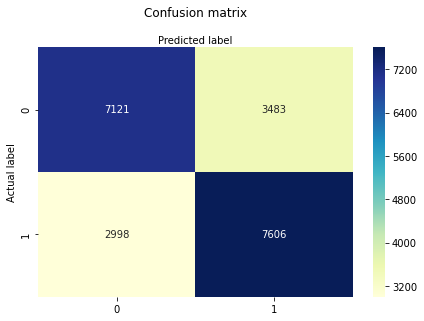

In [64]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [65]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.694407770652584


In [72]:
print(classification_report(y_test, y_pred3, target_names=target_names))

              precision    recall  f1-score   support

 no diabetes       0.70      0.67      0.69     10604
    diabetes       0.69      0.72      0.70     10604

    accuracy                           0.69     21208
   macro avg       0.69      0.69      0.69     21208
weighted avg       0.69      0.69      0.69     21208



In [66]:
#k=5
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_scaled,y_train.values.ravel())
y_pred4 = knn2.predict(X_test_scaled)
cnf_matrix4 = metrics.confusion_matrix(y_test, y_pred4)
cnf_matrix4


array([[7202, 3402],
       [2692, 7912]], dtype=int64)

In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))

Accuracy: 0.7126556016597511


In [73]:
print(classification_report(y_test, y_pred4, target_names=target_names))

              precision    recall  f1-score   support

 no diabetes       0.73      0.68      0.70     10604
    diabetes       0.70      0.75      0.72     10604

    accuracy                           0.71     21208
   macro avg       0.71      0.71      0.71     21208
weighted avg       0.71      0.71      0.71     21208



In [68]:
#k=7
knn3 = KNeighborsClassifier(n_neighbors=7)
knn3.fit(X_train_scaled,y_train.values.ravel())
y_pred5 = knn3.predict(X_test_scaled)
cnf_matrix5 = metrics.confusion_matrix(y_test, y_pred5)
cnf_matrix5

array([[7191, 3413],
       [2530, 8074]], dtype=int64)

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))

Accuracy: 0.7197755563938136


In [74]:
print(classification_report(y_test, y_pred5, target_names=target_names))

              precision    recall  f1-score   support

 no diabetes       0.74      0.68      0.71     10604
    diabetes       0.70      0.76      0.73     10604

    accuracy                           0.72     21208
   macro avg       0.72      0.72      0.72     21208
weighted avg       0.72      0.72      0.72     21208



In [75]:
y_knn_proba = knn3.predict_proba(X_test)


c:\Users\qiuxi\Anaconda3_2\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<AxesSubplot:title={'center':'PR Curve for knn'}, xlabel='Recall', ylabel='Precision'>

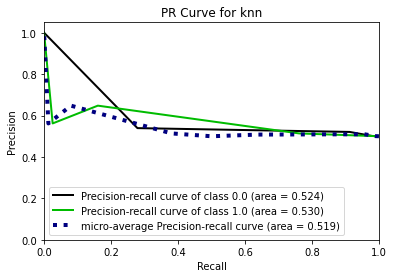

In [76]:
skplt.metrics.plot_precision_recall(y_test, y_knn_proba, title = 'PR Curve for knn')

In [133]:
y_clf_proba = clf.predict_proba(X_test)

c:\Users\qiuxi\Anaconda3_2\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<AxesSubplot:title={'center':'PR Curve for rf'}, xlabel='Recall', ylabel='Precision'>

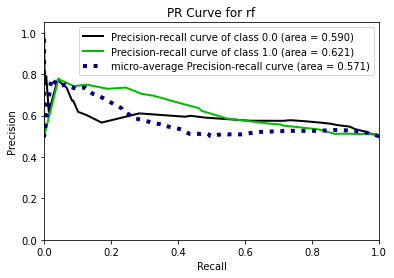

In [135]:
skplt.metrics.plot_precision_recall(y_test, y_clf_proba, title = 'PR Curve for rf')

In [175]:
data.iloc[0]['BMI']

26.0

In [176]:
for i in range(len(data)):
  if data.iloc[i]['BMI']>=85:
    print(data.iloc[i])

Age                      2.0
Sex                      0.0
HighChol                 0.0
CholCheck                1.0
BMI                     92.0
Smoker                   1.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
GenHlth                  2.0
MentHlth                30.0
PhysHlth                 0.0
DiffWalk                 0.0
Diabetes                 0.0
Hypertension             0.0
Stroke                   0.0
Name: 553, dtype: float64
Age                     10.0
Sex                      0.0
HighChol                 1.0
CholCheck                1.0
BMI                     98.0
Smoker                   1.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
GenHlth                  2.0
MentHlth                 0.0
PhysHlth                20.0
DiffWalk                 0.0
Diabetes         